# Gaia Star Query

https://astroquery.readthedocs.io/en/latest/gaia/gaia.html

In [1]:
# import matplotlib to show plots inline.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [26]:
plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [2]:
import astroquery
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle
import astropy.units as u

In [3]:
from astroquery.simbad import Simbad
from astroquery.gaia import Gaia

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [4]:
gindex=0

In [5]:
Galaxy_Name=["lmc","smc"]

In [6]:
Galaxy_Delta_RA=[10.75,5.33]
Galaxy_Delta_DEC=[9.17,3.083]

In [7]:
GName=Galaxy_Name[gindex]
galaxy_delta_ra=Galaxy_Delta_RA[gindex]
galaxy_delta_dec=Galaxy_Delta_DEC[gindex]

In [8]:
result_table = Simbad.query_object(GName)
result_table.pprint(show_unit=True)

MAIN_ID      RA        DEC    ... COO_QUAL COO_WAVELENGTH     COO_BIBCODE    
          "h:m:s"    "d:m:s"  ...                                            
-------- ---------- --------- ... -------- -------------- -------------------
NAME LMC 05 23 34.6 -69 45 22 ...        D              O 2003A&A...412...45P


In [9]:
Angle(result_table["RA"][0]+" hour")

<Angle 5.39294444 hourangle>

In [10]:
Angle(result_table["DEC"][0]+" degrees")

<Angle -69.75611111 deg>

In [11]:
galaxy_coord=SkyCoord(ra=result_table["RA"][0]+"hour",dec=result_table["DEC"][0]+ "degrees")
galaxy_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (80.89416667, -69.75611111)>

In [12]:
galaxy_ra=galaxy_coord.ra.deg
galaxy_dec=galaxy_coord.dec.deg

In [13]:
Gaia.ROW_LIMIT = -1
width = u.Quantity(0.01, u.deg)
height = u.Quantity(0.01, u.deg)
r = Gaia.query_object_async(coordinate=galaxy_coord, width=width, height=height)
r.pprint()

INFO: Query finished. [astroquery.utils.tap.core]
         dist             solution_id     ... epoch_photometry_url
                                          ...                     
--------------------- ------------------- ... --------------------
  0.00046837777838698 1635721458409799680 ...                     
 0.000532991830259734 1635721458409799680 ...                     
 0.000701920895774868 1635721458409799680 ...                     
0.0007610013305639609 1635721458409799680 ...                     
0.0010190008887011263 1635721458409799680 ...                     
 0.001104738980956511 1635721458409799680 ...                     
0.0011573615582263258 1635721458409799680 ...                     
0.0011694630579769584 1635721458409799680 ...                     
0.0011807404720021056 1635721458409799680 ...                     
0.0012290093441252616 1635721458409799680 ...                     
                  ...                 ... ...                  ...
0.0036998533

In [18]:
print(r.colnames)

['solution_id', 'designation', 'source_id', 'random_index', 'ref_epoch', 'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error', 'parallax_over_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr', 'dec_parallax_corr', 'dec_pmra_corr', 'dec_pmdec_corr', 'parallax_pmra_corr', 'parallax_pmdec_corr', 'pmra_pmdec_corr', 'astrometric_n_obs_al', 'astrometric_n_obs_ac', 'astrometric_n_good_obs_al', 'astrometric_n_bad_obs_al', 'astrometric_gof_al', 'astrometric_chi2_al', 'astrometric_excess_noise', 'astrometric_excess_noise_sig', 'astrometric_params_solved', 'astrometric_primary_flag', 'astrometric_weight_al', 'astrometric_pseudo_colour', 'astrometric_pseudo_colour_error', 'mean_varpi_factor_al', 'astrometric_matched_observations', 'visibility_periods_used', 'astrometric_sigma5d_max', 'frame_rotator_object_type', 'matched_observations', 'duplicated_source', 'phot_g_n_obs', 'phot_g_mean_flux', 'phot_g_mean_flux_erro

Text(0.5, 0.98, 'Magnitude in Gaia')

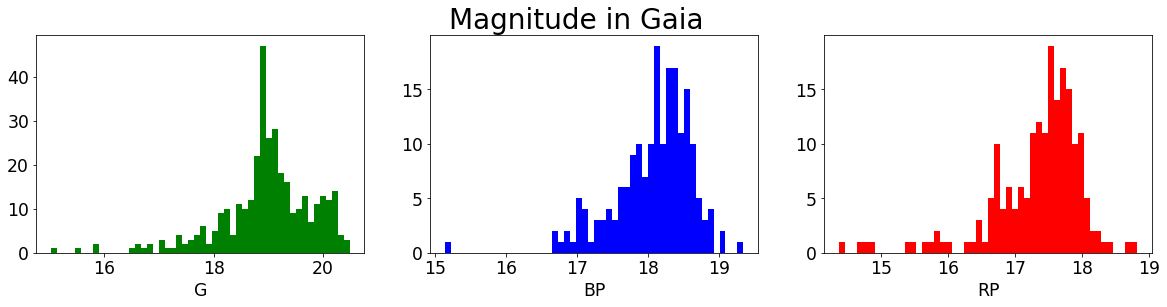

In [30]:
fig=plt.figure(figsize=(20,4))
ax1=fig.add_subplot(131)
ax1.hist(r["phot_g_mean_mag"],bins=50,facecolor="g");
ax1.set_xlabel("G")
ax2=fig.add_subplot(132)
ax2.hist(r["phot_bp_mean_mag"],bins=50,facecolor="b");
ax2.set_xlabel("BP")
ax3=fig.add_subplot(133)
ax3.hist(r["phot_rp_mean_mag"],bins=50,facecolor="r");
ax3.set_xlabel("RP")
plt.suptitle("Magnitude in Gaia",fontsize=28)

In [ ]:
j = Gaia.cone_search_async(coordinate=galaxy_coord, radius=0.5*u.deg)
r = j.get_results()
r.pprint()

In [ ]:
fig=plt.figure(figsize=(20,4))
ax1=fig.add_subplot(131)
ax1.hist(r["phot_g_mean_mag"],bins=50,facecolor="g");
ax1.set_xlabel("G")
ax2=fig.add_subplot(132)
ax2.hist(r["phot_bp_mean_mag"],bins=50,facecolor="b");
ax2.set_xlabel("BP")
ax3=fig.add_subplot(133)
ax3.hist(r["phot_rp_mean_mag"],bins=50,facecolor="r");
ax3.set_xlabel("RP")
plt.suptitle("Magnitude in Gaia",fontsize=28)